# Metadata

```
Name: Maureen O'Shea (mo2cr@virginia.edu)
Course: DS5001
Date: 06 May 2022

Title:   Sentiment Analysis of Plays and Visualizations
Description:  Use the NRC lexicon and VADER to explore sentiment in plays and in genres. Create bar charts of sentiments in plays. Explore sentiment between plays of the same genre with VADER.

Original Code Author: R.C. Alvarado, Module 10 Lab, Use the NRC lexicon to explore sentiment

```

# Set Up

In [1]:
data_home = './data'
data_prefix = 'folger'

In [2]:
OHCO = ['play_code', 'act_num', 'scene_num', 'speech_id', 'speaker','line_num']

In [3]:
salex_csv = f'{data_home}/salex_nrc.csv'
#salex_csv = f'{data_home}/salex_bing.csv'

In [4]:
emo_cols = "anger anticipation disgust fear joy sadness surprise trust polarity".split()

In [12]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
import plotly_express as px
from IPython.display import display, HTML

In [13]:
sns.set()

## Get Lexicon

In [14]:
SALEX = pd.read_csv(salex_csv).set_index('term_str')
SALEX.columns = [col.replace('nrc_','') for col in SALEX.columns]
#SALEX.columns = [col.replace('bing_','') for col in SALEX.columns]

In [15]:
SALEX

,anger,anticipation,disgust,fear,joy,negative,positive,sadness,surprise,trust,polarity
term_str,,,,,,,,,,,
abandon,0,0,0,1,0,1,0,1,0,0,-1
abandoned,1,0,0,1,0,1,0,1,0,0,-1
abandonment,1,0,0,1,0,1,0,1,1,0,-1
abduction,0,0,0,1,0,1,0,1,1,0,-1
aberration,0,0,1,0,0,1,0,0,0,0,-1
...,...,...,...,...,...,...,...,...,...,...,...
young,0,1,0,0,1,0,1,0,1,0,1
youth,1,1,0,1,1,0,1,0,1,0,1
zeal,0,1,0,0,1,0,1,0,1,1,1


## Get Plays

In [16]:
TOKEN = pd.read_csv(f'{data_home}/{data_prefix}-CORPUS2.csv', low_memory=False).set_index(OHCO).sort_index()
LIB = pd.read_csv(f"{data_home}/{data_prefix}-LIB2.csv", low_memory=False).set_index('play_code').sort_index()
#LIB['label'] = LIB.apply(lambda x: f"{x.author_id}: {x.name} ({x.genre_id})", 1)

In [17]:
class Plays(): pass
plays = Plays()
for id in LIB.index.values:
    setattr(plays, id, id)

In [18]:
LIB

,play_title,year,source_file_path,genre,play_id,play_len,n_acts,n_scenes,n_speeches,label
play_code,,,,,,,,,,
1H4,"Henry IV, Part 1",1597,https://www.folgerdigitaltexts.org/1H4,history,7,16214,5,22,384,"1597 (h): Henry IV, Part 1"
1H6,"Henry VI, Part 1",1591,https://www.folgerdigitaltexts.org/1H6,history,10,36113,5,30,1022,"1591 (h): Henry VI, Part 1"
2H4,"Henry IV, Part 2",1597,https://www.folgerdigitaltexts.org/2H4,history,8,8652,5,21,297,"1597 (h): Henry IV, Part 2"
2H6,"Henry VI, Part 2",1590,https://www.folgerdigitaltexts.org/2H6,history,11,10098,5,25,321,"1590 (h): Henry VI, Part 2"
3H6,"Henry VI, Part 3",1590,https://www.folgerdigitaltexts.org/3H6,history,12,16091,5,28,651,"1590 (h): Henry VI, Part 3"
AWW,All's Well That Ends Well,1602,https://www.folgerdigitaltexts.org/AWW,comedy,0,11552,5,22,419,1602 (c): All's Well That Ends Well
AYL,As You Like It,1599,https://www.folgerdigitaltexts.org/AYL,comedy,2,8058,5,16,232,1599 (c): As You Like It
Ado,Much Ado About Nothing,1598,https://www.folgerdigitaltexts.org/Ado,comedy,23,5405,5,8,216,1598 (c): Much Ado About Nothing
Ant,Antony and Cleopatra,1606,https://www.folgerdigitaltexts.org/Ant,tragedy,1,12677,5,40,721,1606 (t): Antony and Cleopatra


In [19]:
plays.H8

'H8'

In [20]:
TOKEN

token_str     pos  \
play_code act_num scene_num speech_id speaker    line_num                     
1H4       1       1         1         henryiv    1               So      av   
                                                 1           shaken     vvn   
                                                 1               as  acp-cs   
                                                 1               we     pns   
                                                 1              are     vvb   
...                                                             ...     ...   
Wiv       5       5         2908      masterford 254          shall     vmb   
                                                 254            lie     vvi   
                                                 254           with   acp-p   
                                                 254       Mistress      n1   
                                                 254           Ford   n1-nn   

                                                           term_str  
play_code act_num scene_num speech_id speaker    line_num            
1H4       1       1         1         henryiv    1               so  
                                                 1           shaken  
                                                 1               as  
                                                 1               we  
                                                 1              are  
...                                                             ...  
Wiv       5       5         2908      masterford 254          shall  
                                                 254            lie  
                                                 254           with  
                                                 254       mistress  
                                                 254           ford  

[593339 rows x 3 columns]

**Get `BOW` by chapter, `VOCAB`, `tfidf`, `dfidf`**

In [21]:
BOW = TOKEN.value_counts(OHCO[:2] + ['term_str']).to_frame('n').sort_index()
VOCAB = TOKEN.value_counts('term_str').to_frame('n').sort_index()
N = len(BOW.groupby(OHCO[:2]))
VOCAB['df'] = BOW.groupby('term_str').count()
VOCAB['dfidf'] = VOCAB.df * np.log2(N/VOCAB.df)
BOW['tf'] = (BOW.unstack().T / BOW.unstack().T.sum()).T.stack()
BOW['tfidf'] = BOW.tf * np.log2(N/VOCAB.df)

In [22]:
VOCAB

,n,df,dfidf
term_str,,,
a,8527,185,0.000000
aaron,24,3,17.839257
aarons,1,1,7.531381
abandon,2,2,13.062763
abandoned,6,6,29.678514
...,...,...,...
zodiacs,1,1,7.531381
zone,1,1,7.531381
zounds,11,10,42.094534


In [23]:
bag = OHCO[:2]

In [24]:
DOC = TOKEN.groupby(bag).term_str.count().to_frame('n')

In [25]:
DOC.head()

n
play_code act_num      
1H4       1        3066
          2        2023
          3        3520
          4        4823
          5        2782

## Create `COMBO`

In [26]:
COMBO = TOKEN.join(LIB).join(SALEX, on='term_str').join(BOW, on=OHCO[:2] + ['term_str'])
COMBO = COMBO.drop(['n', 'tf'], axis=1)
COMBO = COMBO.sort_index()

In [27]:
COMBO

token_str     pos  \
play_code act_num scene_num speech_id speaker    line_num                     
1H4       1       1         1         henryiv    1               So      av   
                                                 1           shaken     vvn   
                                                 1               as  acp-cs   
                                                 1               we     pns   
                                                 1              are     vvb   
...                                                             ...     ...   
Wiv       5       5         2908      masterford 254          shall     vmb   
                                                 254            lie     vvi   
                                                 254           with   acp-p   
                                                 254       Mistress      n1   
                                                 254           Ford   n1-nn   

                                                           term_str  \
play_code act_num scene_num speech_id speaker    line_num             
1H4       1       1         1         henryiv    1               so   
                                                 1           shaken   
                                                 1               as   
                                                 1               we   
                                                 1              are   
...                                                             ...   
Wiv       5       5         2908      masterford 254          shall   
                                                 254            lie   
                                                 254           with   
                                                 254       mistress   
                                                 254           ford   

                                                                           play_title  \
play_code act_num scene_num speech_id speaker    line_num                               
1H4       1       1         1         henryiv    1                   Henry IV, Part 1   
                                                 1                   Henry IV, Part 1   
                                                 1                   Henry IV, Part 1   
                                                 1                   Henry IV, Part 1   
                                                 1                   Henry IV, Part 1   
...                                                                               ...   
Wiv       5       5         2908      masterford 254       The Merry Wives of Windsor   
                                                 254       The Merry Wives of Windsor   
                                                 254       The Merry Wives of Windsor   
                                                 254       The Merry Wives of Windsor   
                                                 254       The Merry Wives of Windsor   

                                                           year  \
play_code act_num scene_num speech_id speaker    line_num         
1H4       1       1         1         henryiv    1         1597   
                                                 1         1597   
                                                 1         1597   
                                                 1         1597   
                                                 1         1597   
...                                                         ...   
Wiv       5       5         2908      masterford 254       1600   
                                                 254       1600   
                                                 254       1600   
                                                 254       1600   
                                                 254       1600   

                                                                            

In [28]:
COMBO.dropna()

token_str    pos  \
play_code act_num scene_num speech_id speaker    line_num                    
1H4       1       1         1         henryiv    1              wan      j   
                                                 2            peace     n1   
                                                 5             soil     n1   
                                                 7              war     n1   
                                                 8           bruise    vvi   
...                                                             ...    ...   
Wiv       5       5         2908      masterford 252            Sir     n1   
                                                 252           John  n1-nn   
                                                 253           word     n1   
                                                 254            lie    vvi   
                                                 254       Mistress     n1   

                                                           term_str  \
play_code act_num scene_num speech_id speaker    line_num             
1H4       1       1         1         henryiv    1              wan   
                                                 2            peace   
                                                 5             soil   
                                                 7              war   
                                                 8           bruise   
...                                                             ...   
Wiv       5       5         2908      masterford 252            sir   
                                                 252           john   
                                                 253           word   
                                                 254            lie   
                                                 254       mistress   

                                                                           play_title  \
play_code act_num scene_num speech_id speaker    line_num                               
1H4       1       1         1         henryiv    1                   Henry IV, Part 1   
                                                 2                   Henry IV, Part 1   
                                                 5                   Henry IV, Part 1   
                                                 7                   Henry IV, Part 1   
                                                 8                   Henry IV, Part 1   
...                                                                               ...   
Wiv       5       5         2908      masterford 252       The Merry Wives of Windsor   
                                                 252       The Merry Wives of Windsor   
                                                 253       The Merry Wives of Windsor   
                                                 254       The Merry Wives of Windsor   
                                                 254       The Merry Wives of Windsor   

                                                           year  \
play_code act_num scene_num speech_id speaker    line_num         
1H4       1       1         1         henryiv    1         1597   
                                                 2         1597   
                                                 5         1597   
                                                 7         1597   
                                                 8         1597   
...                                                         ...   
Wiv       5       5         2908      masterford 252       1600   
                                                 252       1600   
                                                 253       1600   
                                                 254       1600   
                                                 254       1600   

                                                                                 source_f

# Sentiment by Play using Relative Mean

In [29]:
PLAYS = COMBO.groupby(OHCO[:1])[emo_cols+['tfidf']].mean().join(LIB.label)         
#PLAYS = (COMBO.groupby(OHCO[:1])[emo_cols+['tfidf']].sum().T / DOC.n).T.join(LIB.label)

In [30]:
PLAYS.sort_values('polarity')

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,polarity,tfidf,label
play_code,,,,,,,,,,,
Mac,0.316948,0.269993,0.244314,0.391783,0.282465,0.330888,0.193690,0.391783,-0.093910,0.000853,1605 (t): Macbeth
1H6,0.314905,0.269919,0.265312,0.376152,0.291599,0.327100,0.171274,0.395393,-0.076423,0.000532,"1591 (h): Henry VI, Part 1"
R2,0.280870,0.253913,0.243913,0.376957,0.290000,0.350435,0.153913,0.399130,-0.067826,0.000586,1595 (h): Richard II
2H6,0.329545,0.265496,0.273760,0.370868,0.277893,0.298554,0.194215,0.432851,-0.043388,0.001079,"1590 (h): Henry VI, Part 2"
Ham,0.275658,0.275121,0.270285,0.360559,0.305212,0.299839,0.196131,0.413756,-0.041376,0.000617,1600 (t): Hamlet
Tit,0.299726,0.278356,0.247123,0.351233,0.305753,0.334247,0.189589,0.400548,-0.037808,0.000991,1593 (t): Titus Andronicus
3H6,0.309389,0.253308,0.233774,0.366730,0.291745,0.312539,0.168242,0.415249,-0.036547,0.000771,"1590 (h): Henry VI, Part 3"
Lr,0.281430,0.223760,0.281430,0.324106,0.285467,0.302191,0.152826,0.415802,-0.014418,0.000626,1605 (t): King Lear
Err,0.333655,0.239151,0.243973,0.329797,0.296046,0.303761,0.180328,0.406943,-0.011572,0.001049,1589 (c): The Comedy of Errors


In [31]:
px.bar(PLAYS.reset_index().sort_values('polarity'), emo_cols, 'label', orientation='h', height=1000)

/Users/maureenoshea/opt/anaconda3/lib/python3.7/site-packages/google/colab/data_table.py:30: UserWarning:

IPython.utils.traitlets has moved to a top-level traitlets package.



In [32]:
px.bar(PLAYS.reset_index().sort_values('polarity'), 'polarity', 'label', orientation='h', height=1000)

# Compare Titus Andronicus and Henry VIII

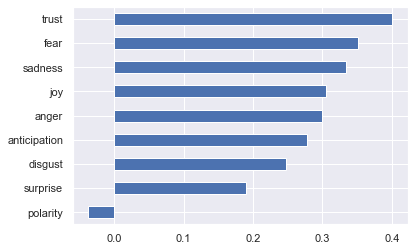

In [33]:
#TITUS ANDRONICUS
PLAYS.loc[plays.Tit, emo_cols].sort_values().plot.barh();

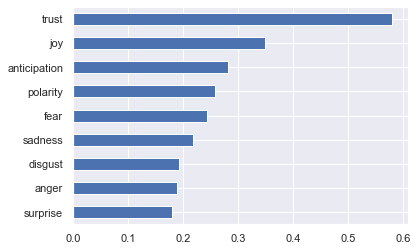

In [34]:
#HENRY VIII
PLAYS.loc[plays.H8, emo_cols].sort_values().plot.barh();

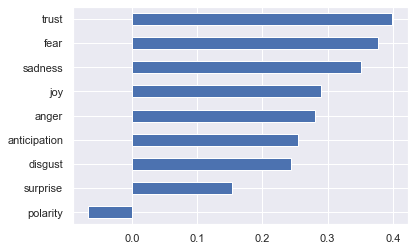

In [35]:
# RICHARD II
PLAYS.loc[plays.R2, emo_cols].sort_values().plot.barh();

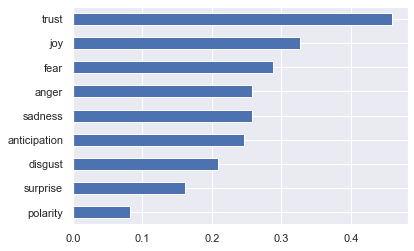

In [36]:
# TROILUS and CRESSIDA
PLAYS.loc[plays.Tro, emo_cols].sort_values().plot.barh();

#### The relative mean sentiment of Titus Andronicus graph resembles that of Richard II(history genre). the relative mean sentiment of Henry VII resembles that of a tragedy genre, Troilus and Cressida.

# Mean Sentiment by Act

In [37]:
ACTS = COMBO.groupby(OHCO[:2])[emo_cols+['tfidf']].mean()

In [38]:
ACTS.loc['Tit'].style.background_gradient(cmap='GnBu', high=.5, axis=None)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,polarity,tfidf
act_num,,,,,,,,,,
1,0.195122,0.260163,0.200542,0.203252,0.346883,0.211382,0.149051,0.585366,0.333333,0.001658
2,0.302198,0.302198,0.192308,0.324176,0.315934,0.335165,0.195055,0.379121,-0.087912,0.000717
3,0.297101,0.242754,0.271739,0.365942,0.257246,0.449275,0.192029,0.311594,-0.181159,0.000953
4,0.307087,0.299213,0.278215,0.375328,0.317585,0.262467,0.202100,0.433071,-0.026247,0.000955
5,0.381609,0.278161,0.289655,0.468966,0.282759,0.427586,0.206897,0.289655,-0.229885,0.000743


In [39]:
ACTS.loc['H8'].style.background_gradient(cmap='GnBu', high=.5, axis=None)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,polarity,tfidf
act_num,,,,,,,,,,
1,0.217593,0.222222,0.240741,0.273148,0.303241,0.222222,0.157407,0.518519,0.178241,0.000596
2,0.206564,0.256757,0.173745,0.256757,0.332046,0.206564,0.171815,0.573359,0.235521,0.000505
3,0.192000,0.294000,0.200000,0.256000,0.358000,0.238000,0.192000,0.596000,0.222000,0.000583
4,0.160000,0.316000,0.164000,0.188000,0.428000,0.260000,0.196000,0.572000,0.352000,0.000868
5,0.156448,0.336152,0.179704,0.217759,0.363636,0.186047,0.188161,0.627907,0.342495,0.000517


In [40]:
ACTS.loc['R2'].style.background_gradient(cmap='GnBu', high=.5, axis=None)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,polarity,tfidf
act_num,,,,,,,,,,
1,0.317742,0.272581,0.225806,0.383871,0.256452,0.350000,0.179032,0.396774,-0.064516,0.000539
2,0.250501,0.232465,0.232465,0.348697,0.302605,0.336673,0.172345,0.408818,-0.032064,0.000584
3,0.319915,0.262712,0.273305,0.427966,0.283898,0.391949,0.118644,0.353814,-0.175847,0.000631
4,0.246875,0.243750,0.253125,0.346875,0.296875,0.331250,0.121875,0.481250,-0.012500,0.000623
5,0.241645,0.249357,0.244216,0.365039,0.329049,0.334190,0.159383,0.377892,-0.033419,0.000580


In [41]:
ACTS.loc['Tro'].style.background_gradient(cmap='GnBu', high=.5, axis=None)

,anger,anticipation,disgust,fear,joy,sadness,surprise,trust,polarity,tfidf
act_num,,,,,,,,,,
1,0.250847,0.200000,0.176271,0.267797,0.362712,0.223729,0.128814,0.457627,0.098305,0.000935
2,0.254386,0.206140,0.223684,0.289474,0.241228,0.271930,0.114035,0.451754,-0.004386,0.000942
3,0.185039,0.240157,0.153543,0.228346,0.385827,0.228346,0.181102,0.488189,0.212598,0.000785
4,0.269608,0.257353,0.237745,0.291667,0.357843,0.262255,0.186275,0.458333,0.134804,0.000823
5,0.300254,0.295165,0.231552,0.338422,0.277354,0.287532,0.173028,0.442748,-0.015267,0.001122


In [42]:
FIG = dict(figsize=(25, 5), legend=True, fontsize=14, rot=45)

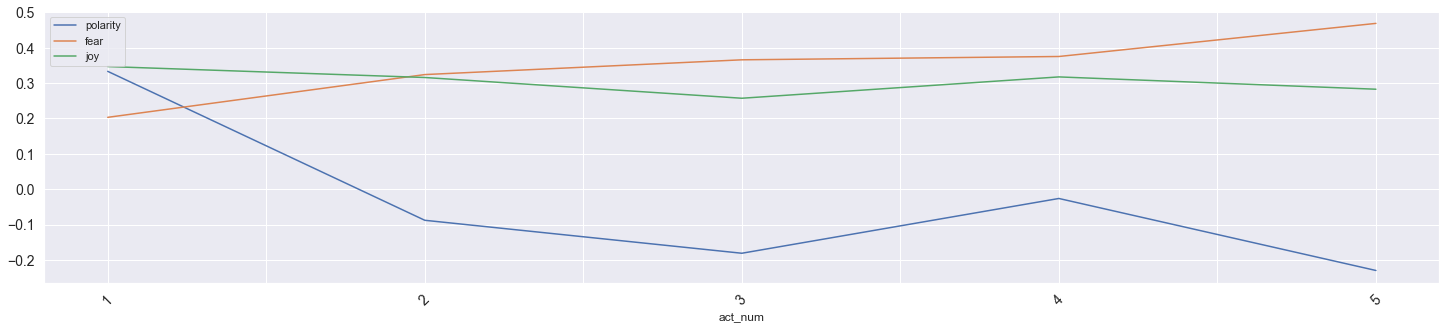

In [43]:
ACTS.loc[plays.Tit][['polarity', 'fear','joy']].plot(**FIG);

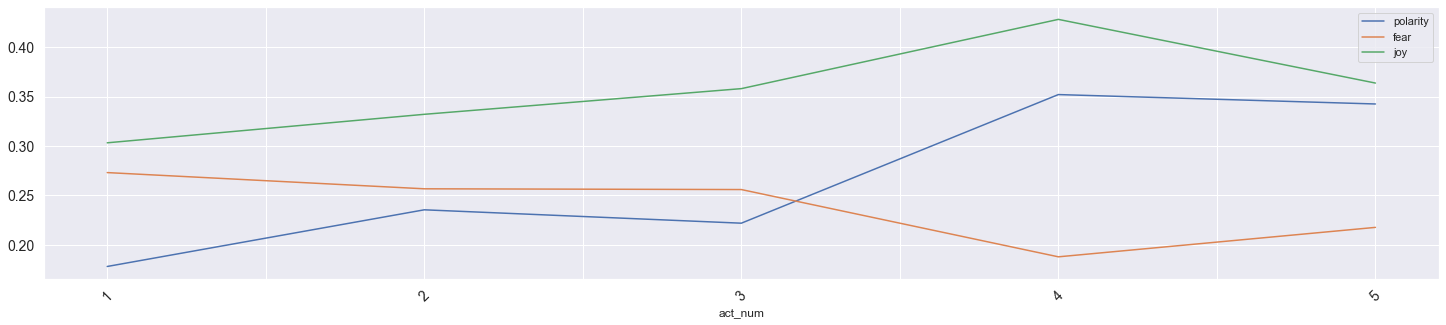

In [44]:
ACTS.loc[plays.H8][['polarity', 'fear','joy']].plot(**FIG);

In [45]:
COMBO['html'] = COMBO.fillna(0).apply(lambda x: f"<sdan class='sent{int(np.sign(x['polarity']))}'>{x.term_str}</span>", 1)

In [46]:
COMBO.html.head()

play_code  act_num  scene_num  speech_id  speaker  line_num
1H4        1        1          1          henryiv  1               <sdan class='sent0'>so</span>
                                                   1           <sdan class='sent0'>shaken</span>
                                                   1               <sdan class='sent0'>as</span>
                                                   1               <sdan class='sent0'>we</span>
                                                   1              <sdan class='sent0'>are</span>
Name: html, dtype: object

In [54]:
SENTENCES = COMBO.groupby(OHCO[:6])[emo_cols].mean() #.term_str.count().to_frame('n').join(LIB).join(SALEX)

In [55]:
SENTENCES

anger  \
play_code act_num scene_num speech_id speaker      line_num          
1H4       1       1         1         henryiv      1           0.0   
                                                   2           0.0   
                                                   3           NaN   
                                                   4           NaN   
                                                   5           0.0   
...                                                            ...   
Wiv       5       5         2903      mistresspage 250         0.0   
                                                   251         0.0   
                            2908      masterford   252         0.0   
                                                   253         0.0   
                                                   254         1.0   

                                                             anticipation  \
play_code act_num scene_num speech_id speaker      line_num                 
1H4       1       1         1         henryiv      1                  0.0   
                                                   2                  1.0   
                                                   3                  NaN   
                                                   4                  NaN   
                                                   5                  0.0   
...                                                                   ...   
Wiv       5       5         2903      mistresspage 250                0.0   
                                                   251                0.0   
                            2908      masterford   252                0.0   
                                                   253                0.0   
                                                   254                0.0   

                                                             disgust  fear  \
play_code act_num scene_num speech_id speaker      line_num                  
1H4       1       1         1         henryiv      1             0.0   1.0   
                                                   2             0.0   0.0   
                                                   3             NaN   NaN   
                                                   4             NaN   NaN   
                                                   5             1.0   0.0   
...                                                              ...   ...   
Wiv       5       5         2903      mistresspage 250           0.0   0.0   
                                                   251           0.5   0.0   
                            2908      masterford   252           0.5   0.0   
                                                   253           0.0   0.0   
                                                   254           1.0   0.0   

                                                             joy  sadness  \
play_code act_num scene_num speech_id speaker      line_num                 
1H4       1       1         1         henryiv      1         0.0      1.0   
                                                   2         1.0      0.0   
                                                   3         NaN      NaN   
                                                   4         NaN      NaN   
                                                   5         0.0      0.0   
...                                                          ...      ...   
Wiv       5       5         2903      mistresspage 250       1.0      0.0   
                                                   251       0.0      0.0   
                            2908      masterford   252       0.0      0.0   
                                                   253       0.0      0.0   
                                                   254       0.0      0.5   

                                                             surprise  trust  \
play_code act_num scene_num speech_id speaker      

In [56]:
SENTENCES['html_str'] = COMBO.groupby(OHCO[:6]).html.apply(lambda x: x.str.cat(sep=' '))

In [58]:
def sample_sentences(df, sample_size=10, emo='polarity'):

    rows = []
    sample = df.dropna().sample(sample_size).index    
    for idx in sample:
        valence = round(df.loc[idx, emo], 4)
        id_label = ' '.join([str(i) for i in idx]).upper()
        t = 0
        if valence > t: color = '#ccffcc'
        elif valence < t: color = '#ffcccc'
        else: color = '#f2f2f2'
        z = 0
        rows.append("""
        <tr style="background-color:{0};padding:.5rem 1rem;font-size:110%;">
            <td style="width:20%;">{1}</td>
            <td style="width:70%;">{2}</td>
            <td>{3}</td>
        </tr>
        """.format(color, id_label, df.loc[idx, 'html_str'], valence))   

    css = """
    #sample1 td {font-size:110%;vertical-align:top;text-align:left;} 
    #sample1 th {font-size:120%;vertical-align:top;text-align:left;} 
    .sent-1 {color:red;font-weight:bold;} 
    .sent1 {color:green;font-weight:bold;}
    """
    display(HTML(f'<style>{css}</style>'))
    display(HTML('<table id="sample1"><tr><th>Sentence</th><th>ID</th><th>Sentiment</th></tr>'+''.join(rows)+'</table>'))

In [59]:
sample_sentences(SENTENCES.loc['H8'])

Sentence,ID,Sentiment
5 4 3210 CRANMER 49,her ashes new create another heir,0.0
3 1 1723 CAMPEIUS 191,beware you lose it not for us if you please,-1.0
2 4 1332 WOLSEY 68,what is unsettled in the king,-1.0
4 2 2511 GRIFFITH 88,she is asleep good wench lets sit down quiet,0.3333
2 3 1241 OLDLADY 103,for any suit of pounds and you o fate,-1.0
5 0 1 PROLOGUE 22,will leave us never an understanding friend,0.3333
3 2 1861 SUFFOLK 122,does whet his anger to him,-1.0
4 2 2575 KATHERINE 160,is that his noble grace would have some pity,1.0
2 3 1212 CHAMBERLAIN 72,perceive i speak sincerely and high notes,1.0
1 3 554 CHAMBERLAIN 9,for when they hold em you would swear directly,1.0


# Explore VADER

In [60]:
LIB.index

Index(['1H4', '1H6', '2H4', '2H6', '3H6', 'AWW', 'AYL', 'Ado', 'Ant', 'Cor',
       'Cym', 'Err', 'H5', 'H8', 'Ham', 'JC', 'Jn', 'LLL', 'Lr', 'MM', 'MND',
       'MV', 'Mac', 'Oth', 'Per', 'R2', 'R3', 'Rom', 'Shr', 'TGV', 'TN', 'Tim',
       'Tit', 'Tmp', 'Tro', 'WT', 'Wiv'],
      dtype='object', name='play_code')

In [61]:
from vaderSentiment.vaderSentiment import SentimentIntensityAnalyzer

In [62]:
analyser = SentimentIntensityAnalyzer()

In [63]:
SENTENCES['sent_str'] = COMBO.groupby(OHCO[:6]).term_str.apply(lambda x: x.str.cat(sep=' '))
vader_cols = [f"vader_{col}" for col in "neg neu pos compound".split()]
SENTENCES[vader_cols] = SENTENCES.sent_str.apply(analyser.polarity_scores).apply(lambda x: pd.Series(x))

In [64]:
def vader_plot(novel_name):
    global SENTENCES
    X = SENTENCES.loc[novel_name]
    w = int(len(X)/5)
    fig, axes = plt.subplots(ncols=1, nrows=3, figsize=(25,20))
    X[['vader_pos','vader_neg']].rolling(w).mean().plot(ax=axes[0], title=f'{novel_name}\npos, neg {w}');
    X['vader_neu'].rolling(w).mean().plot(ax=axes[1], title=f'{novel_name}\nneu');
    X['vader_compound'].rolling(w).mean().plot(ax=axes[2], title=f'{novel_name}\ncompound');

In [65]:
LIB.index

Index(['1H4', '1H6', '2H4', '2H6', '3H6', 'AWW', 'AYL', 'Ado', 'Ant', 'Cor',
       'Cym', 'Err', 'H5', 'H8', 'Ham', 'JC', 'Jn', 'LLL', 'Lr', 'MM', 'MND',
       'MV', 'Mac', 'Oth', 'Per', 'R2', 'R3', 'Rom', 'Shr', 'TGV', 'TN', 'Tim',
       'Tit', 'Tmp', 'Tro', 'WT', 'Wiv'],
      dtype='object', name='play_code')

## Henry VIII

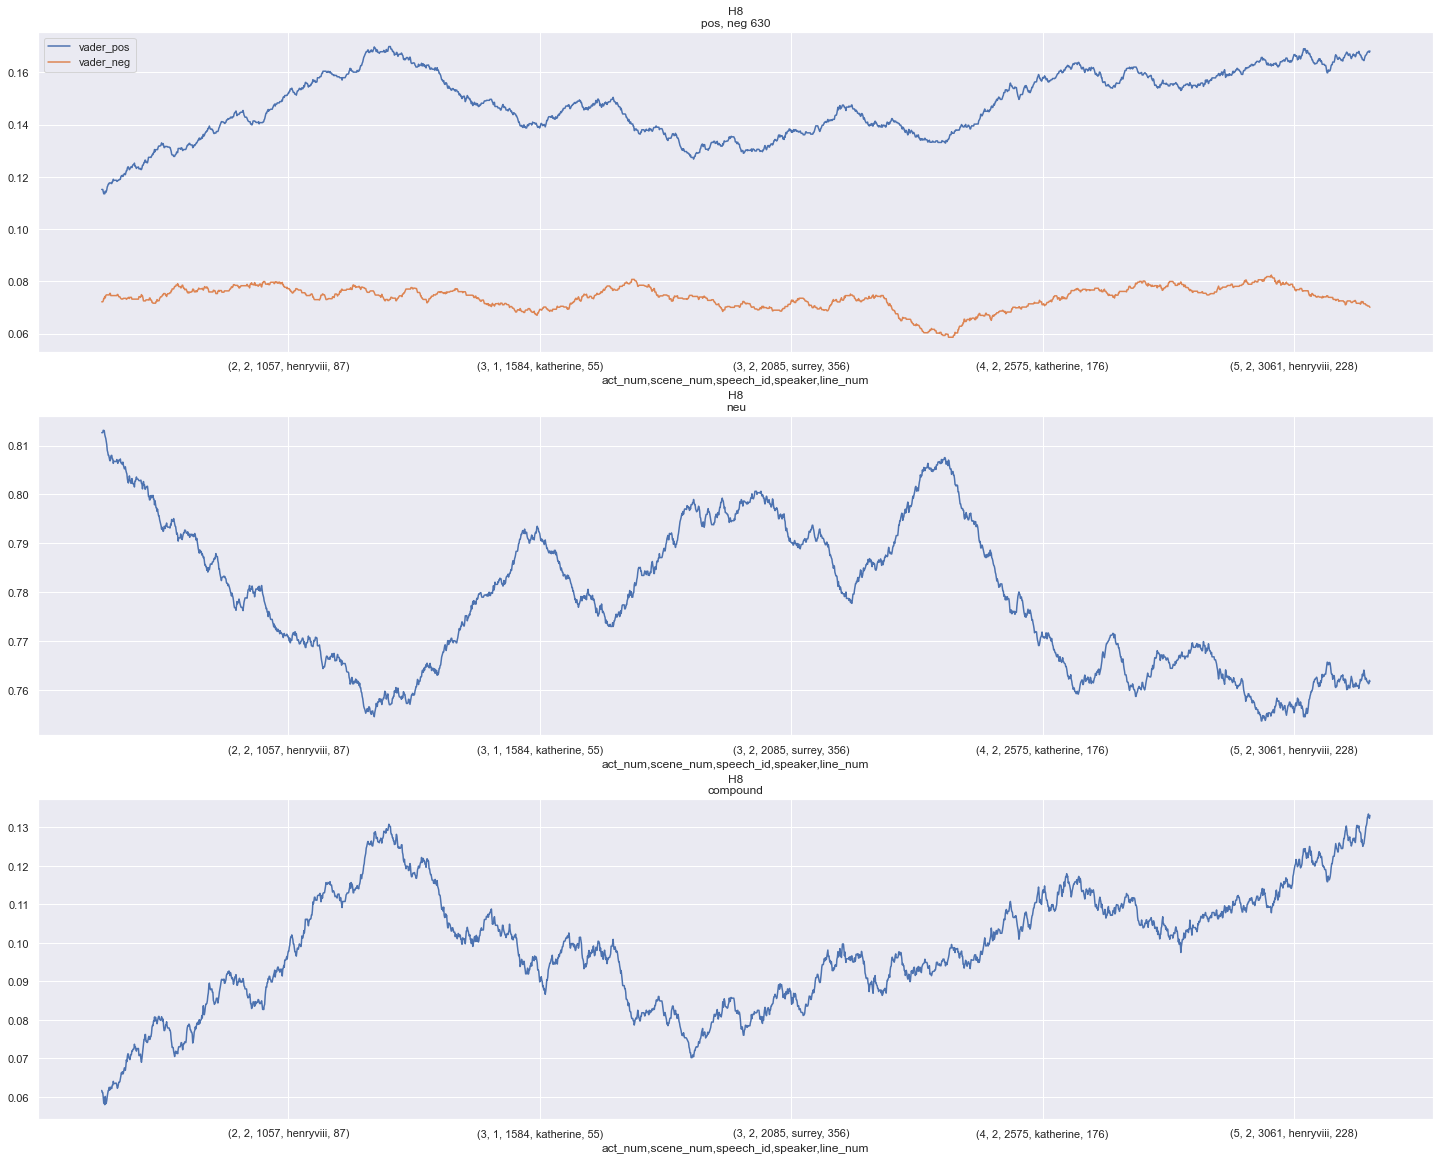

In [66]:
vader_plot('H8')

## Titus Andronicus

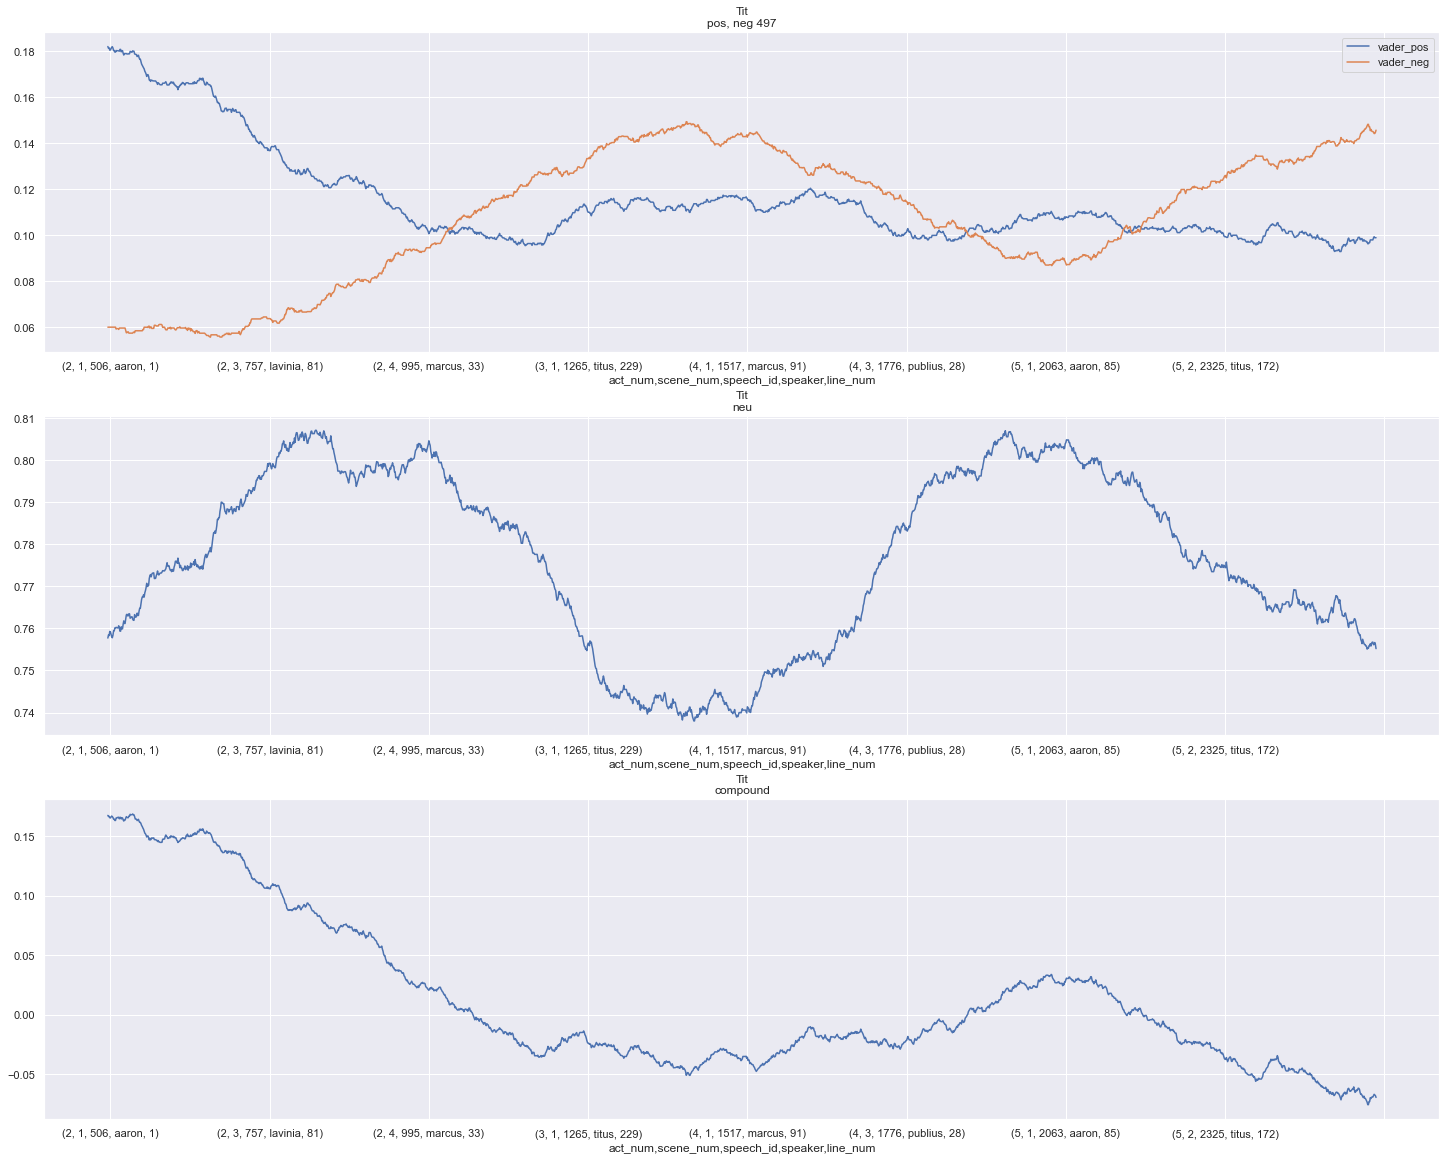

In [67]:
vader_plot('Tit')

## Troilus and Cressida

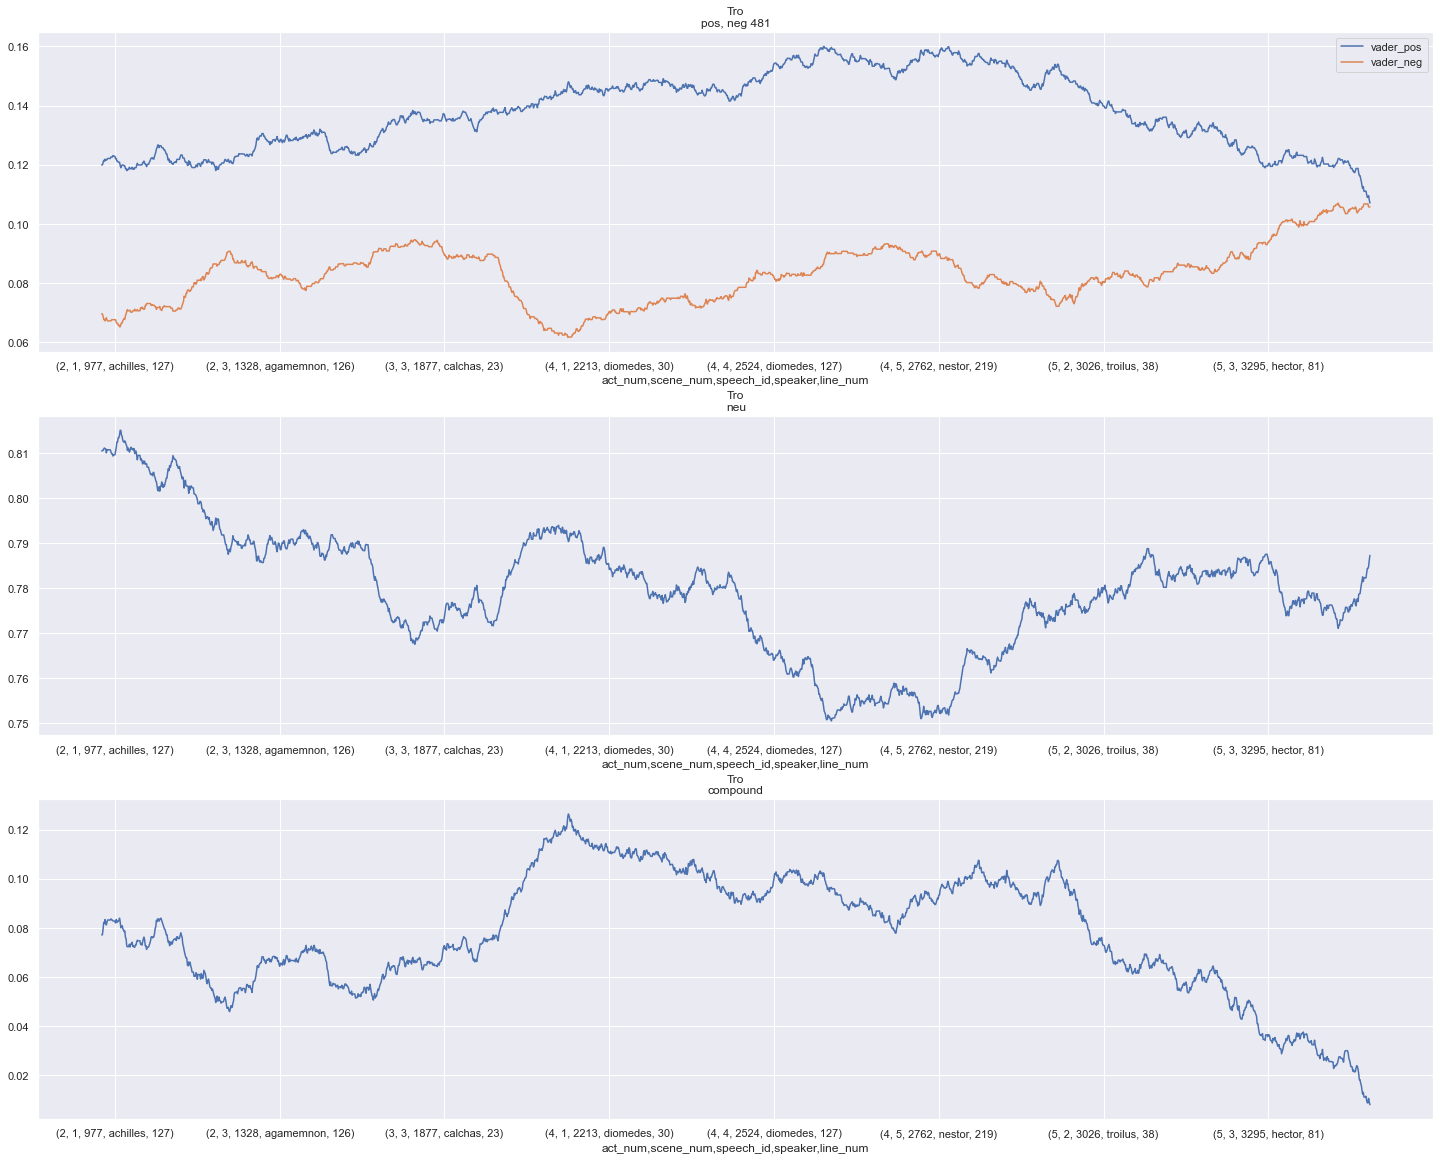

In [68]:
vader_plot('Tro')

## Richard II

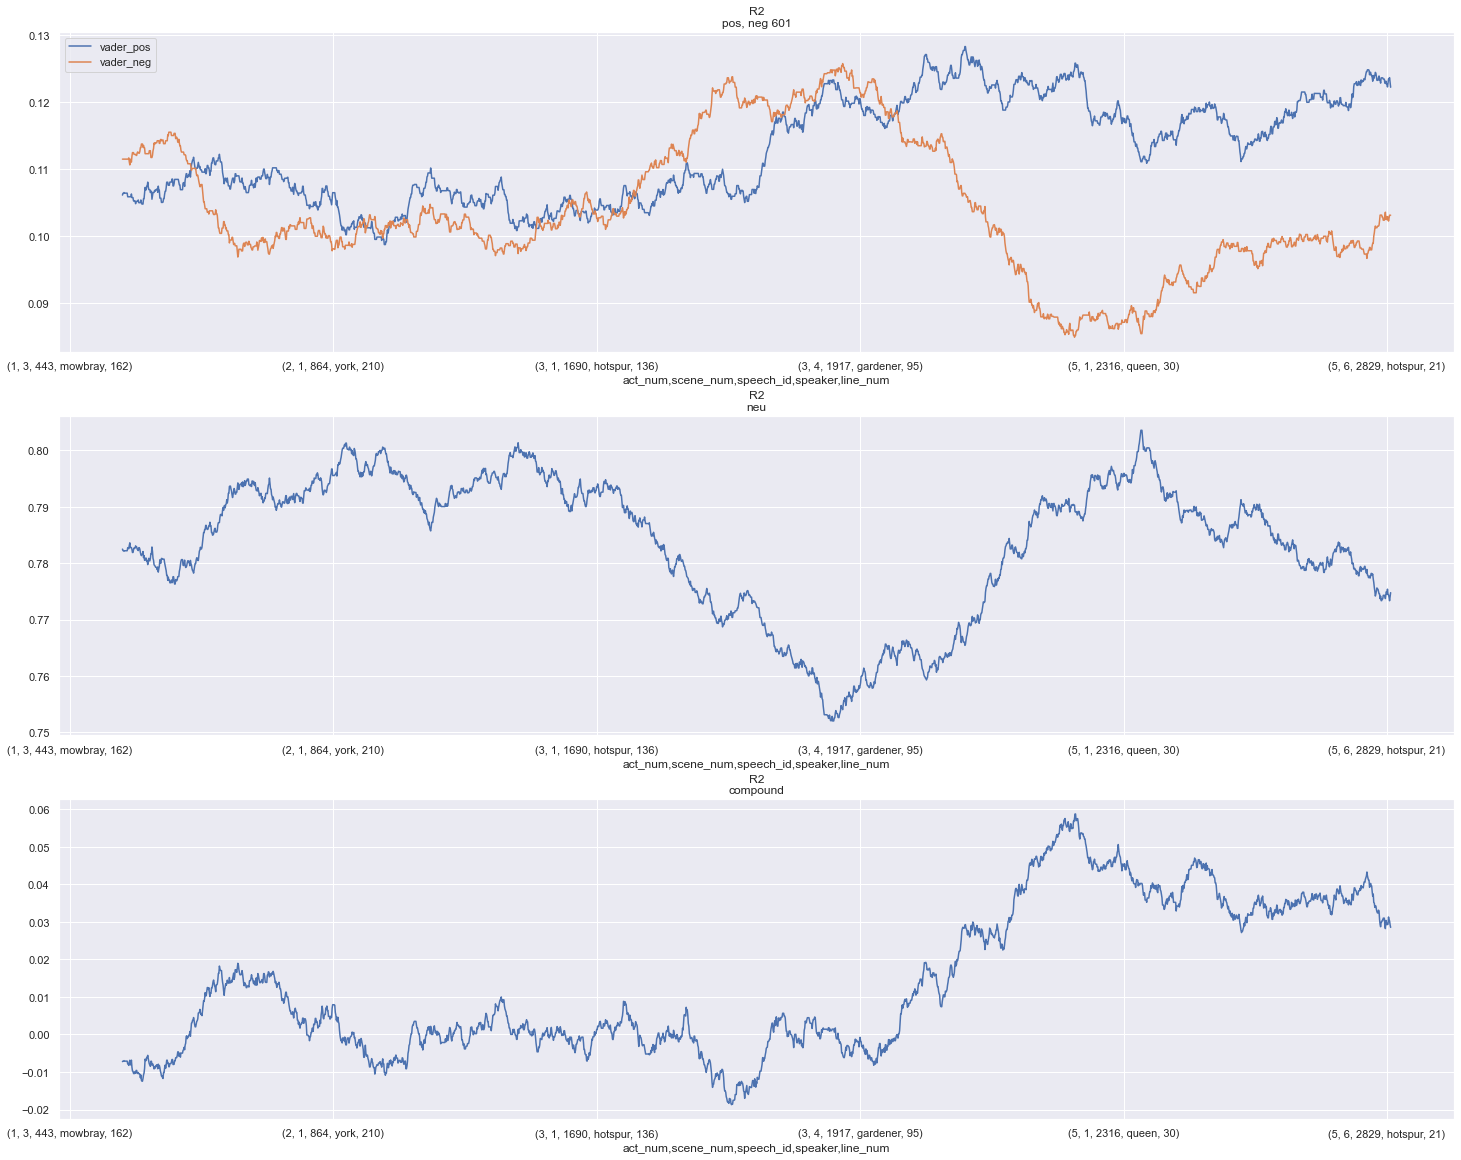

In [69]:
vader_plot('R2')

## Compare Plays

In [70]:
#def compare_novels(novel_a, novel_b,novel_c,novel_d,novel_e,novel_f,novel_g,novel_h,novel_j,novel_k, novel_n, w=10, emo='vader_compound'):
def compare_novels(novel_a, novel_b,novel_c,novel_d,novel_e,novel_f, w=10, emo='vader_compound'):   
    global SENTENCES, FIG
    
    A = SENTENCES.loc[novel_a].reset_index(drop=True).reset_index().rename(columns=dict(index='seq'))
    A['cut'] = pd.cut(A.seq, 100)
    A1 = A.groupby('cut')[emo].mean().reset_index(drop=True)

    B = SENTENCES.loc[novel_b].reset_index(drop=True).reset_index().rename(columns=dict(index='seq'))
    B['cut'] = pd.cut(B.seq, 100)
    B1 = B.groupby('cut')[emo].mean().reset_index(drop=True)
    
    C = SENTENCES.loc[novel_c].reset_index(drop=True).reset_index().rename(columns=dict(index='seq'))
    C['cut'] = pd.cut(C.seq, 100)
    C1 = C.groupby('cut')[emo].mean().reset_index(drop=True)

    D = SENTENCES.loc[novel_d].reset_index(drop=True).reset_index().rename(columns=dict(index='seq'))
    D['cut'] = pd.cut(D.seq, 100)
    D1 = D.groupby('cut')[emo].mean().reset_index(drop=True)
    
    E = SENTENCES.loc[novel_e].reset_index(drop=True).reset_index().rename(columns=dict(index='seq'))
    E['cut'] = pd.cut(E.seq, 100)
    E1 = E.groupby('cut')[emo].mean().reset_index(drop=True)

    F = SENTENCES.loc[novel_f].reset_index(drop=True).reset_index().rename(columns=dict(index='seq'))
    F['cut'] = pd.cut(F.seq, 100)
    F1 = F.groupby('cut')[emo].mean().reset_index(drop=True)
  

    CONCAT = pd.concat([A1,B1,C1,D1, E1, F1], axis=1)
    CONCAT.columns = [novel_a, novel_b,novel_c,novel_d,novel_e,novel_f,]

    plt = CONCAT.rolling(w).mean().plot(**FIG)

In [71]:
LIB.index

Index(['1H4', '1H6', '2H4', '2H6', '3H6', 'AWW', 'AYL', 'Ado', 'Ant', 'Cor',
       'Cym', 'Err', 'H5', 'H8', 'Ham', 'JC', 'Jn', 'LLL', 'Lr', 'MM', 'MND',
       'MV', 'Mac', 'Oth', 'Per', 'R2', 'R3', 'Rom', 'Shr', 'TGV', 'TN', 'Tim',
       'Tit', 'Tmp', 'Tro', 'WT', 'Wiv'],
      dtype='object', name='play_code')

## Compare History Genre

In [72]:
LIB[LIB.genre == 'history'].index.tolist()

['1H4', '1H6', '2H4', '2H6', '3H6', 'H5', 'H8', 'Jn', 'R2', 'R3']

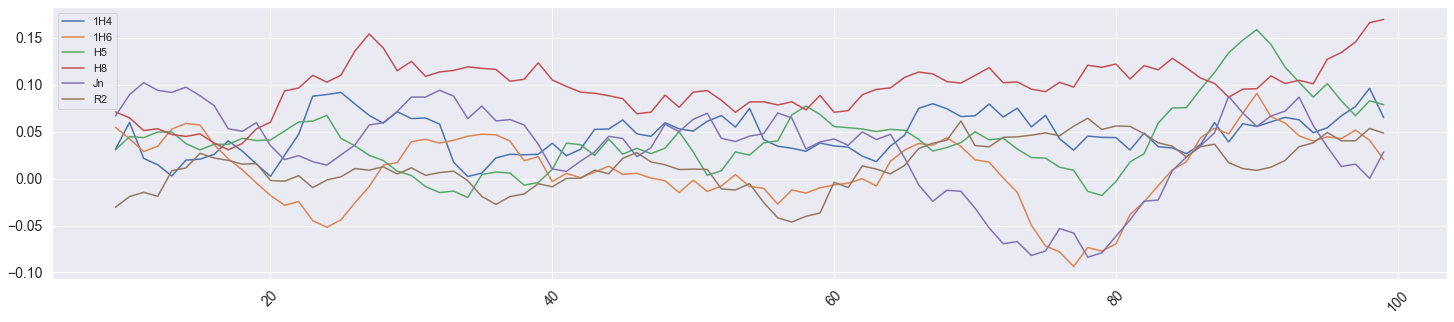

In [73]:
compare_novels('1H4', '1H6', 'H5', 'H8', 'Jn', 'R2')

## Compare Tragedy Genre

In [74]:
LIB[LIB.genre == 'tragedy'].index.tolist()

['Ant', 'Cor', 'Ham', 'JC', 'Lr', 'Mac', 'Oth', 'Rom', 'Tim', 'Tit', 'Tro']

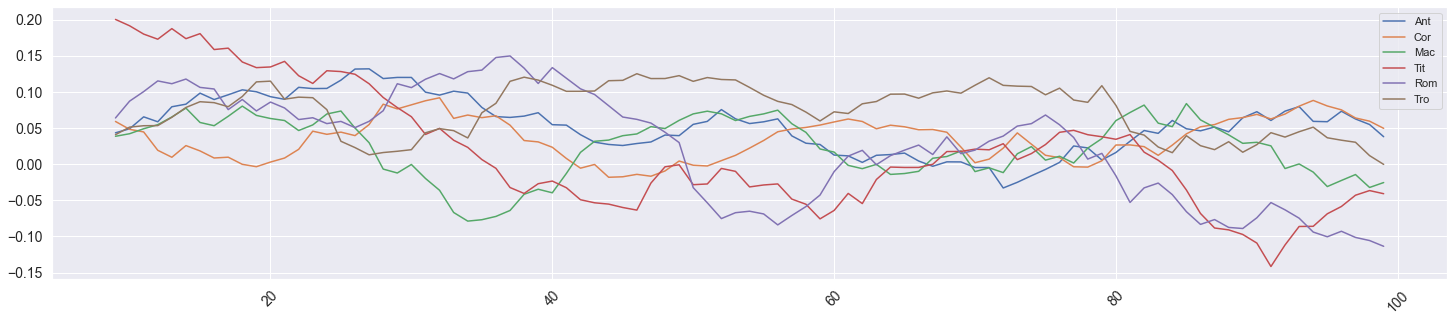

In [75]:
compare_novels('Ant', 'Cor', 'Mac', 'Tit','Rom', 'Tro')

## Compare 2 histories and 2 tragedies

In [79]:
#def compare_novels(novel_a, novel_b,novel_c,novel_d,novel_e,novel_f,novel_g,novel_h,novel_j,novel_k, novel_n, w=10, emo='vader_compound'):
def compare_novels(novel_a, novel_b,novel_c,novel_d, w=10, emo='vader_compound'):   
    global SENTENCES, FIG
    
    A = SENTENCES.loc[novel_a].reset_index(drop=True).reset_index().rename(columns=dict(index='seq'))
    A['cut'] = pd.cut(A.seq, 100)
    A1 = A.groupby('cut')[emo].mean().reset_index(drop=True)

    B = SENTENCES.loc[novel_b].reset_index(drop=True).reset_index().rename(columns=dict(index='seq'))
    B['cut'] = pd.cut(B.seq, 100)
    B1 = B.groupby('cut')[emo].mean().reset_index(drop=True)
    
    C = SENTENCES.loc[novel_c].reset_index(drop=True).reset_index().rename(columns=dict(index='seq'))
    C['cut'] = pd.cut(C.seq, 100)
    C1 = C.groupby('cut')[emo].mean().reset_index(drop=True)

    D = SENTENCES.loc[novel_d].reset_index(drop=True).reset_index().rename(columns=dict(index='seq'))
    D['cut'] = pd.cut(D.seq, 100)
    D1 = D.groupby('cut')[emo].mean().reset_index(drop=True)
    
  

    CONCAT = pd.concat([A1,B1,C1,D1], axis=1)
    CONCAT.columns = [novel_a, novel_b,novel_c,novel_d,]

    plt = CONCAT.rolling(w).mean().plot(**FIG)

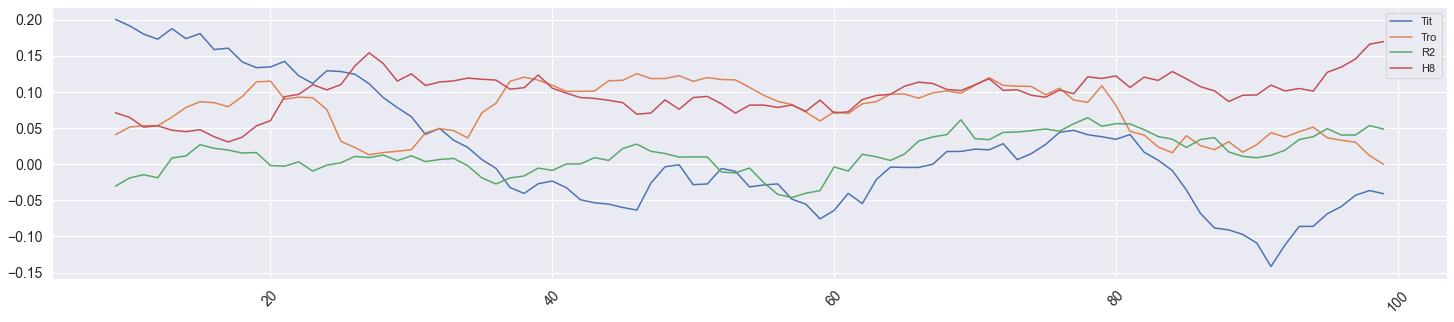

In [80]:
compare_novels("Tit","Tro","R2","H8",  emo='vader_compound')

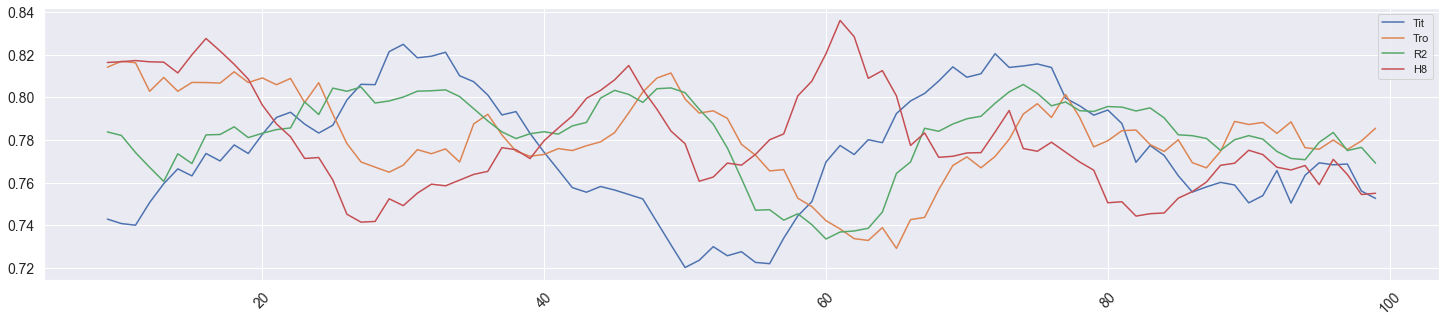

In [81]:
compare_novels("Tit","Tro","R2","H8",  emo='vader_neu')

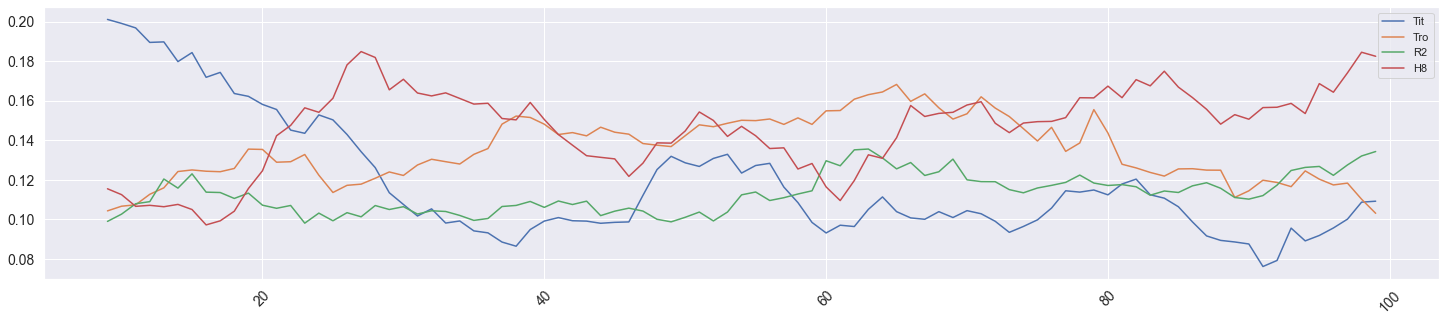

In [83]:
compare_novels("Tit","Tro","R2","H8",  emo='vader_pos')

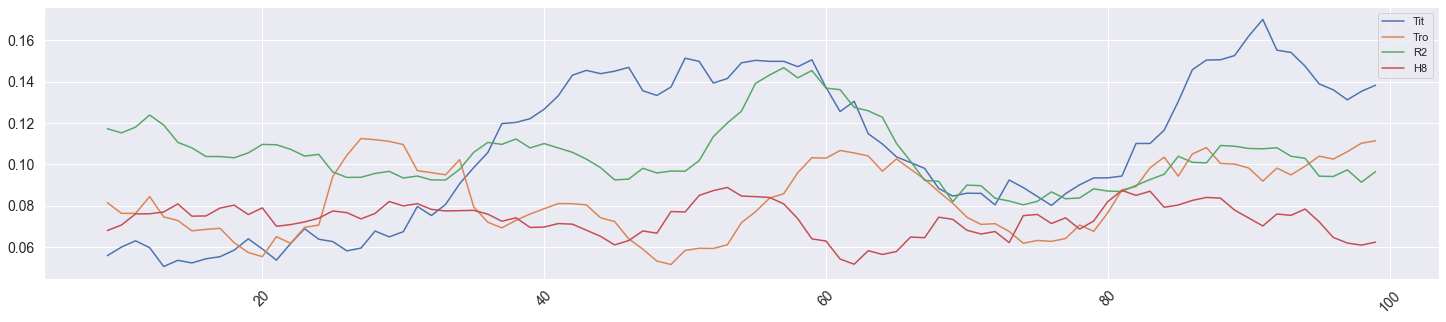

In [84]:
compare_novels("Tit","Tro","R2","H8",  emo='vader_neg')

## Save

In [85]:
SENTENCES.to_csv(f'{data_home}/{data_prefix}-VADER_DOC.csv')